#**Q1. Problem Statement: Regression Case Study**

Load the insurance.csvdataset into a DataFrame and follow given tasks, then build a good linear regression mode

l.Data files contain data for different people having different weights and other detail, and how much they will be charged for their insurance.1.Load the given dataset into a DataFrame

2.Find null values and drop them if it is there

3.Find an Outlier and solve it using the interquartile range (IQR) method

4.Do one-hot encoding for categorical features

5.Split data into X (independent features) and Y(dependent features)

6.Build a simple Linear Regression model  and print the residual plot and 푅2score for test data(take test size as 20%)

7.Find variance inflation factor and build a new model and note the 푅2score and print summary

8.Do Ridge and Lasso regression and print 푅2score for all models.
Day 37 DIY

#**STEP1**
Importing required library in python



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant, OLS

#**STEP2**
Load the dataset


In [ ]:
df = pd.read_csv("/content/sample_data/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#**STEP3**
Describe the 7-point of the statistical analysis

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#**STEP4**
Information about the dataset and which type of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#**STEP5**
Any null value present in the dataset


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#**STEP6**
Boxplot helping to  present in the outliers easy to removing

<Axes: ylabel='charges'>

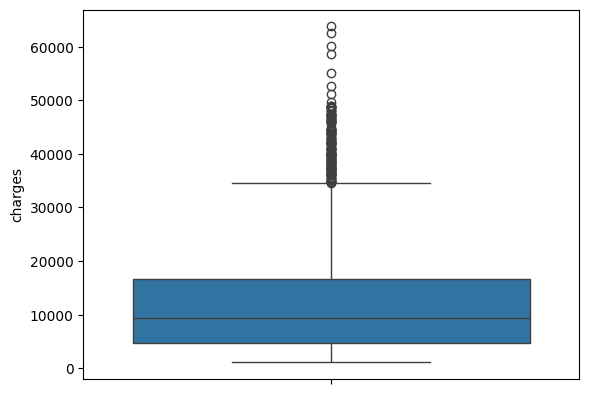

In [ ]:
sns.boxplot(df['charges'])

#**STEP7**
Outliers remove the interquartile range of the lower bound and upper bound

In [ ]:
hp = sorted(df['charges'])
q1, q3= np.percentile(hp,[25,75])
lower_bound = q1 -(1.5 * (q3-q1))
upper_bound = q3 + (1.5 * (q3-q1))
below = df['charges'] > lower_bound
above = df['charges'] < upper_bound
new_df = df[below & above]
new_df.shape

(1199, 7)

<ipython-input-28-5c6191eed1f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

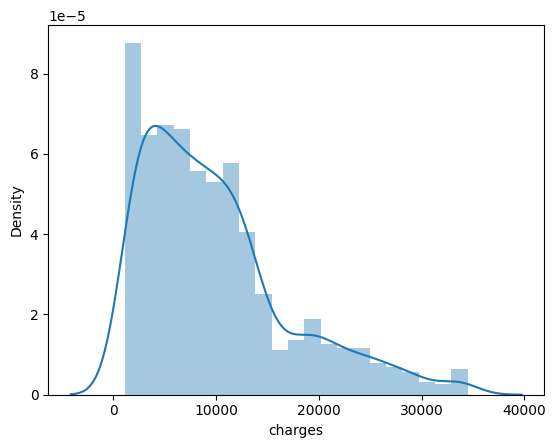

In [ ]:
sns.distplot(new_df['charges'])

#**STEP7**
Category of the data converted into the numerical value of the data and that's helping to evaluting the model

In [ ]:
category = pd.get_dummies(new_df).copy()
print(category.shape)

(1199, 12)


In [ ]:
category.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
x =category.drop(["charges"], axis = 1)
y = category["charges"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=10)
print("X-train :",x_train.shape)
print("X-test: ",x_test.shape)
print("y-train: ",y_train.shape)
print("y-test: ",y_test.shape)

X-train : (959, 11)
X-test:  (240, 11)
y-train:  (959,)
y-test:  (240,)


#**STEP8**
Importing the sklearn library and algorithm of the Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)
pred = model.predict(x_test)

#**STEP9**
Find the R-squared value fiting the minimum error

In [ ]:
r2score = model.score(x_test,y_test)
r2score

0.5295909744394149

In [ ]:
adjustedscore = 1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adjustedscore

0.5068958021535972

Text(0, 0.5, 'residuals')

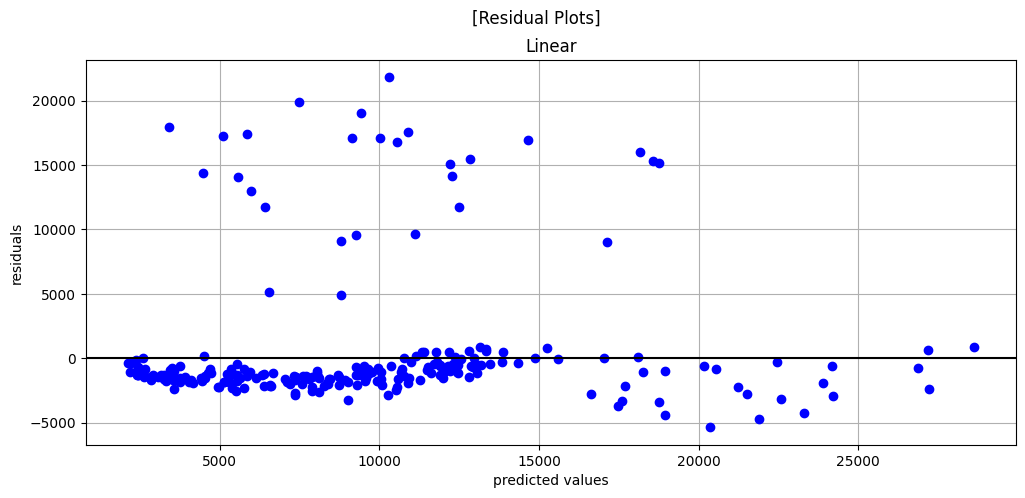

In [ ]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

<ipython-input-37-13c623b9c12b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_linear)


Text(0.5, 1.0, 'Linear')

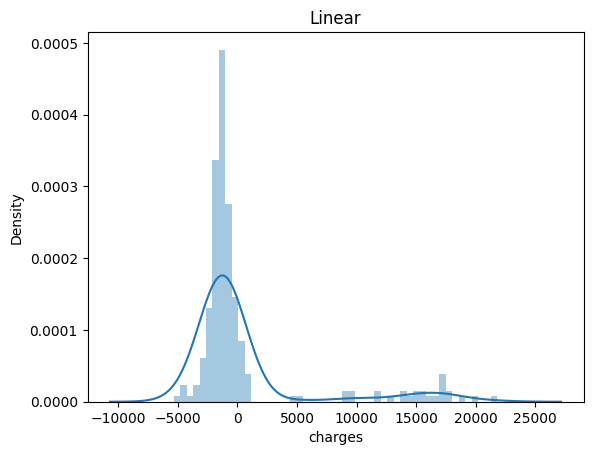

In [ ]:
import seaborn as sns

residuals_linear = y_test - model.predict(x_test)
sns.distplot(residuals_linear)
plt.title('Linear')

<Axes: title={'center': 'Model Coefficients'}>

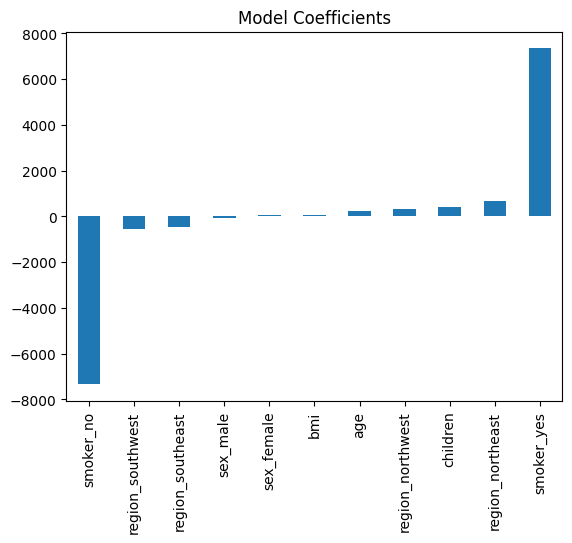

In [ ]:
predictors = x_train.columns
coef = pd.Series(model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

#**STEP10**
VIF using to find the outliers

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif["VIF"]

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


0     1.020381
1     1.167918
2     1.003027
3          inf
4          inf
5          inf
6          inf
7          inf
8          inf
9          inf
10         inf
Name: VIF, dtype: float64

In [ ]:
x = add_constant(x)
tempMaxVIF = 5
maxVIF = 5
trainXCopy = x.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    tempVIFDf = pd.DataFrame()
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    tempVIFDf['Column_Name'] = trainXCopy.columns
    tempVIFDf.dropna(inplace=True)
    tempColumnName = tempVIFDf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]
    tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    if (tempMaxVIF >= maxVIF):
        print(counter)
        print(tempColumnName)
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)
        highVIFColumnNames.append(tempColumnName)
    counter = counter + 1

1
region_southwest
2
smoker_yes
3
sex_male
4
const
5
bmi
6
age


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: R

In [ ]:
print(highVIFColumnNames)

highVIFColumnNames.remove('const')
print(highVIFColumnNames)
print(len(highVIFColumnNames))

x_new = x.drop(highVIFColumnNames, axis = 1)
print(x.shape)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new,y,test_size = 0.20,random_state=10)
m1ModelDef = OLS(y_train2,x_train2)
m1ModelBuild = m1ModelDef.fit()
m1ModelBuild.summary()

['region_southwest', 'smoker_yes', 'sex_male', 'const', 'bmi', 'age']
['region_southwest', 'smoker_yes', 'sex_male', 'bmi', 'age']
5
(1199, 12)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     107.2
Date:                Sun, 21 Jan 2024   Prob (F-statistic):          3.90e-103
Time:                        09:50:00   Log-Likelihood:                -9617.1
No. Observations:                 959   AIC:                         1.925e+04
Df Residuals:                     952   BIC:                         1.928e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.098e+04    674.884     31.085      0.000    1.97e+04    2.23e+04
children           534.3608    147.358      3.626      0.000     245.177     823.545
sex_female         205.3767    356.166      0.577      0.564    -493.584     904.338
smoker_no        -1.394e+04    563.985    -24.720      0.000    -1.5e+04   -1.28e+04
region_northeast  1289.8509    511.599      2.521      0.012     285.859    2293.843
region_northwest   885.8797    506.157      1.750      0.080    -107.433    1879.193
region_southeast    93.0997    506.694      0.184      0.854    -901.267    1087.466
==============================================================================
Omnibus:                      235.116   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.871
Skew:                           1.364   Prob(JB):                    6.35e-110
Kurtosis:                       5.267   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
score3 =  m1ModelBuild.rsquared
score3

0.40312380401823755

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [ ]:
ridgeReg = Ridge(alpha=0.00001)
x3 = category.drop(["charges"], axis = 1).copy()
y3 = category["charges"].copy()
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size = 0.20,random_state=150)

ridgeReg.fit(x_train3,y_train3)
pred = ridgeReg.predict(x_test3)
score4 = ridgeReg.score(x_test3,y_test3)

In [ ]:
ridgeReg.coef_

array([  248.53710684,    48.03205304,   402.11601549,   136.42575524,
        -136.42577183, -7074.51180757,  7074.51173229,   578.94870194,
         505.70608183,  -326.27046298,  -758.38437957])

<Axes: title={'center': 'Model Coefficients'}>

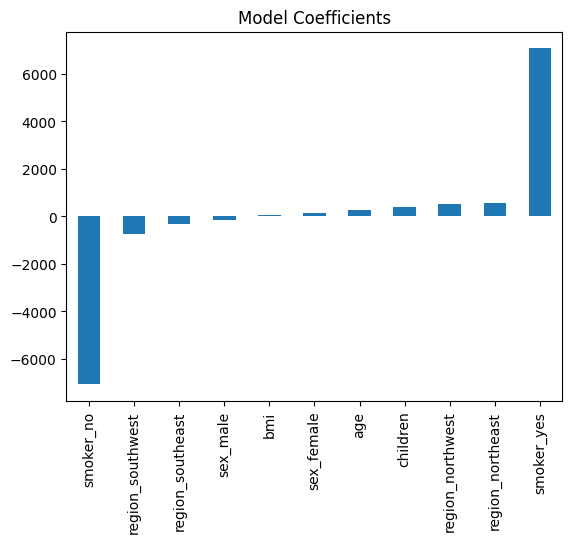

In [ ]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')


In [ ]:
lassoReg = Lasso(alpha=0.0001)
lassoReg.fit(x_train3,y_train3)
pred = lassoReg.predict(x_test3)
score5 = lassoReg.score(x_test3,y_test3)
score5

0.6920606856065208

In [ ]:
lassoReg.coef_

array([ 2.48537106e+02,  4.80320495e+01,  4.02115952e+02,  2.72851125e+02,
       -0.00000000e+00, -1.41490233e+04,  3.66085875e-11,  9.77086191e+02,
        9.03843434e+02,  7.18667251e+01, -3.60246544e+02])

all model score is:
simple linear regression:           0.5295909744394149
After VIF simple linear regression: 0.40312380401823755
ridge regression:                   0.69206068711229
lasso regression:                   0.6920606856065208


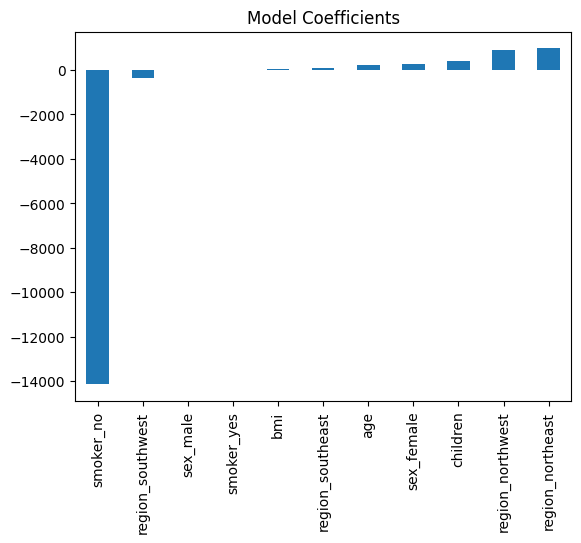

In [ ]:
predictors = x_train.columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
print("all model score is:")
print("simple linear regression:          ",r2score)
print("After VIF simple linear regression:",score3)
print("ridge regression:                  ",score4)
print("lasso regression:                  ",score5)